# Time-Series Analysis and Forecasting with Corn and Wheat Prices

## Part 2 - Generate Seasonal ARIMA Forecasting Model for Corn Price Time-Series Data

### A. Import Required Libraries

Import numpy and pandas libraries, and set %matplotlib inline.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

Import seasonal decomposition, autocorrelation (ACF) and partial autocorrelation function (PACF) graphs, differencing, augmented Dickey-Fuller test, and seasonal ARIMA with exogenous regressors (SARIMAX) tools from statsmodels library.

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

Import Pyramid Arima (pmdarima) tool to determine seasonal ARIMA (SARIMA) orders and select best SARIMA model.

In [3]:
from pmdarima.arima import auto_arima

Load specific evaluation tools.

In [4]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

Ignore harmless warnings.

In [5]:
import warnings
warnings.filterwarnings('ignore')

### B. Import, Inspect, and Visualize Joined Corn and Wheat Price Time-Series Data Set

Import corn and wheat price data pickle file into Pandas dataframe called corn_wheat2.

In [6]:
corn_wheat2 = pd.read_pickle('C://Users/kyrma/Python_for_TS_DA/Capstone_Project/Data/corn_wheat_prices.pickle')

Check number of rows and columns in corn_wheat2 dataframe.

In [7]:
corn_wheat2.shape

(450, 2)

View structure of corn_wheat2 dataframe.

In [8]:
corn_wheat2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 450 entries, 1980-01-01 to 2017-06-01
Data columns (total 2 columns):
Corn_Price     450 non-null float64
Wheat_Price    450 non-null float64
dtypes: float64(2)
memory usage: 10.5 KB


View first five rows of corn_wheat2 dataframe.

In [9]:
corn_wheat2.head()

,Corn_Price,Wheat_Price
Date,,
1980-01-01,105.506813,175.634750
1980-02-01,114.167831,172.695236
1980-03-01,109.837318,163.509323
1980-04-01,108.262604,156.528030
1980-05-01,109.837318,161.304703


Plot out the corn and wheat price data with a reasonable figure size.

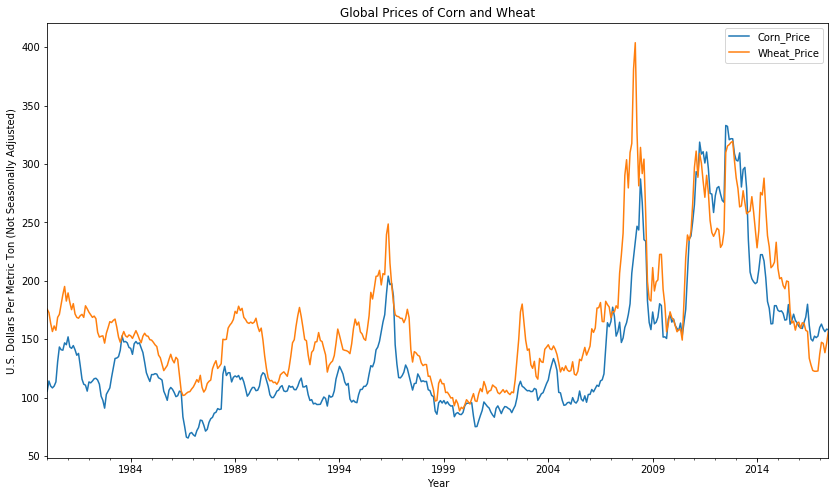

In [10]:
title1 = 'Global Prices of Corn and Wheat'
ylabel1 = 'U.S. Dollars Per Metric Ton (Not Seasonally Adjusted)'
xlabel1 = 'Year'

ax1 = corn_wheat2.plot(figsize=(14,8), title=title1)
ax1.autoscale(axis='x', tight=True)
ax1.set(xlabel=xlabel1, ylabel=ylabel1);

### C. Build SARIMA Model and Forecast One Year Out for Corn Price Time-Series Data

Run an additive error, trend, and seasonality (ETS) decomposition on the global corn price data. The decomposition is additive because the corn price time-series data does not show any exponential growth.

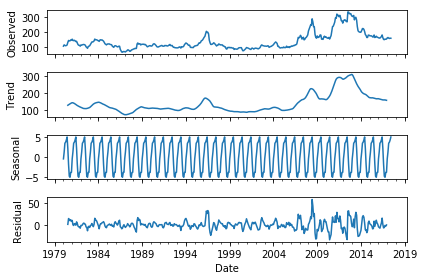

In [11]:
corn_result = seasonal_decompose(corn_wheat2['Corn_Price'], model='add')
corn_result.plot();

* The additive ETS decomposition on the global corn price data reveals that the trend component runs a similar course to the observed time series. Moreover, the time series has a seasonal component and a large residual component. Even though the seasonal component is small in scale compared to the overall values, it exhibits a definite annual seasonality. Monthly global corn prices fluctuate from planting and harvest seasons in corn-growing countries, planted acreage, weather, and growing conditions.   

Plot ACF plot to determine if the global corn price data is stationary or not.

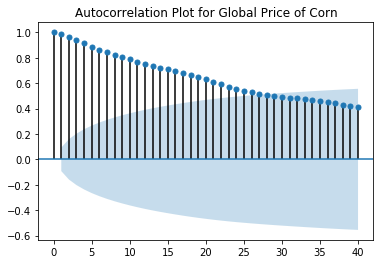

In [12]:
title2 = 'Autocorrelation Plot for Global Price of Corn'
lags1 = 40
plot_acf(corn_wheat2['Corn_Price'], title=title2, lags=lags1);

Plot PACF plot to determine if the global corn price data is stationary or not.

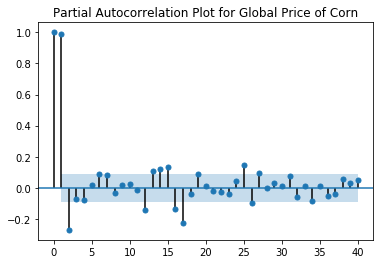

In [13]:
title3 = 'Partial Autocorrelation Plot for Global Price of Corn'
plot_pacf(corn_wheat2['Corn_Price'], title=title3, lags=lags1);

* Based on the above ACF plot, the global corn price data is not stationary. Therefore, the data needs to be differenced until it is stationary.

Plot ACF plot of first difference for global corn price data to determine if it is stationary or not.

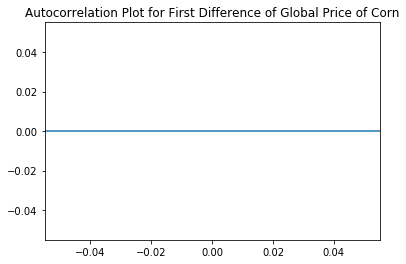

In [14]:
corn_wheat2['Corn_Price_D1'] = diff(corn_wheat2['Corn_Price'], k_diff=1)
title4 = 'Autocorrelation Plot for First Difference of Global Price of Corn'
plot_acf(corn_wheat2['Corn_Price_D1'], title=title4, lags=lags1);

Plot PACF plot of first difference for global corn price data to determine if it is stationary or not.

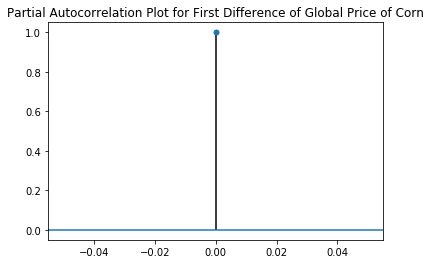

In [15]:
title5 = 'Partial Autocorrelation Plot for First Difference of Global Price of Corn'
plot_pacf(corn_wheat2['Corn_Price_D1'], title=title5, lags=lags1);

Plot out first difference of global corn price data with a reasonable figure size.

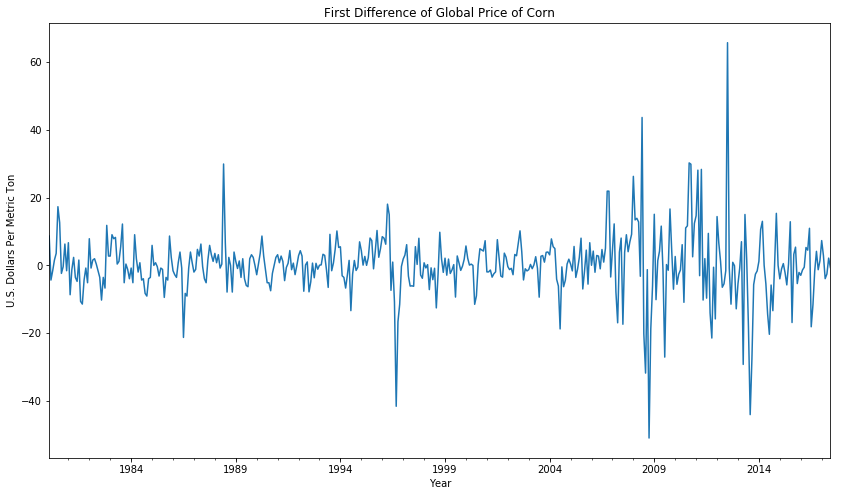

In [16]:
title6 = 'First Difference of Global Price of Corn'
ylabel2 = 'U.S. Dollars Per Metric Ton'
xlabel2 = 'Year'

ax2 = corn_wheat2['Corn_Price_D1'].plot(figsize=(14,8), title=title6)
ax2.autoscale(axis='x', tight=True)
ax2.set(xlabel=xlabel2, ylabel=ylabel2);

* Based on the above PACF and first difference of global corn price data, the first difference is stationary.

Activate following function for running augmented Dickey-Fuller test.

In [17]:
def adf_test(series, title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic', 'p-value', '# lags used', '# observations']
    out = pd.Series(result[0:4], index=labels)

    for key, val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

Subject global corn price data to augmented Dickey-Fuller test.

In [18]:
adf_test(corn_wheat2['Corn_Price'], title='Global Price of Corn')

Augmented Dickey-Fuller Test: Global Price of Corn
ADF test statistic       -2.150161
p-value                   0.224828
# lags used              16.000000
# observations          433.000000
critical value (1%)      -3.445543
critical value (5%)      -2.868238
critical value (10%)     -2.570338
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


Subject first difference of global corn price data to augmented Dickey-Fuller test.

In [19]:
adf_test(corn_wheat2['Corn_Price_D1'], title='First Difference of Global Price of Corn')

Augmented Dickey-Fuller Test: First Difference of Global Price of Corn
ADF test statistic       -4.976504
p-value                   0.000025
# lags used              15.000000
# observations          433.000000
critical value (1%)      -3.445543
critical value (5%)      -2.868238
critical value (10%)     -2.570338
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Run pmdarima.auto_arima's stepwise function to obtain recommended orders of (p,d,q) and (P,D,Q)m for SARIMA model based off smallest Akaike information criterion (AIC). P, D, and Q represent the seasonal regression, differencing, and moving average coefficients, respectively, while m represents the number of rows in each seasonal cycle. The SARIMA model is built from the entire sample of global corn price data.

In [20]:
corn_stepwise_fit = auto_arima(corn_wheat2['Corn_Price'], start_p=0, start_q=0,
                               max_p=6, max_q=3, m=12, 
                               seasonal=True, 
                               d=None, trace=True, 
                               error_action='ignore', # We don't want to know if an order does not work. 
                               suppress_warnings=True, # We don't want convergence warnings. 
                               stepwise=True) # Set to stepwise.

corn_stepwise_fit.summary()

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=3295.496, BIC=3311.924, Fit time=0.230 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=3295.484, BIC=3303.698, Fit time=0.013 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=3273.262, BIC=3289.691, Fit time=0.254 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=3275.408, BIC=3291.836, Fit time=0.287 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=3272.207, BIC=3284.528, Fit time=0.039 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 1, 12); AIC=3272.914, BIC=3289.342, Fit time=0.266 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=3272.153, BIC=3292.688, Fit time=0.340 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=3273.325, BIC=3297.967, Fit time=0.663 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 12); AIC=3272.944, BIC=3297.586, Fit time=0.650 seconds
Fit ARIMA: order=(2, 1, 1) s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  450
Model:             SARIMAX(1, 1, 0)x(2, 0, 1, 12)   Log Likelihood               -1624.725
Date:                            Wed, 22 May 2019   AIC                           3261.451
Time:                                    17:55:33   BIC                           3286.093
Sample:                                         0   HQIC                          3271.164
                                            - 450                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2838      0.741      0.383      0.702      -1.169       1.736
ar.L1          0.2397      0.030      8.074      0.000       0.182       0.298
ar.S.L12      -0.7519      0.122     -6.146      0.000      -0.992      -0.512
ar.S.L24      -0.1633      0.040     -4.035      0.000      -0.243      -0.084
ma.S.L12       0.7241      0.117      6.208      0.000       0.495       0.953
sigma2        81.1386      2.124     38.206      0.000      76.976      85.301
===================================================================================
Ljung-Box (Q):                       48.19   Jarque-Bera (JB):              2748.78
Prob(Q):                              0.18   Prob(JB):                         0.00
Heteroskedasticity (H):               5.76   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Split global corn and wheat price data into training and test sets. The test set is 12 rows long since I want to make a year-long forecast.

In [21]:
train = corn_wheat2.iloc[:len(corn_wheat2) - 12]
test = corn_wheat2.iloc[len(corn_wheat2) - 12:]

Fit an SARIMA(1,1,0)(2,0,1,12) model to global corn price training set.

In [22]:
corn_train_model = SARIMAX(train['Corn_Price'], order=(1,1,0), seasonal_order=(2,0,1,12))
corn_results = corn_train_model.fit()
corn_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         Corn_Price   No. Observations:                  438
Model:             SARIMAX(1, 1, 0)x(2, 0, 1, 12)   Log Likelihood               -1584.957
Date:                            Wed, 22 May 2019   AIC                           3179.915
Time:                                    17:55:34   BIC                           3200.314
Sample:                                01-01-1980   HQIC                          3187.964
                                     - 06-01-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2392      0.031      7.713      0.000       0.178       0.300
ar.S.L12      -0.6831      0.181     -3.777      0.000      -1.037      -0.329
ar.S.L24      -0.1614      0.041     -3.945      0.000      -0.242      -0.081
ma.S.L12       0.6529      0.173      3.764      0.000       0.313       0.993
sigma2        82.5526      2.184     37.805      0.000      78.273      86.832
===================================================================================
Ljung-Box (Q):                       47.84   Jarque-Bera (JB):              2623.98
Prob(Q):                              0.18   Prob(JB):                         0.00
Heteroskedasticity (H):               5.96   Skew:                             0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Obtain predicted values from global corn price training SARIMA(1,1,0)(2,0,1,12) model.

In [23]:
start = len(train)
end = len(train) + len(test) - 1
corn_predictions = corn_results.predict(start=start, end=end, dynamic=False, typ='levels').rename('Corn SARIMA(1,1,0)(2,0,1,12) Predictions')

Plot predictions against known global corn prices in test set.

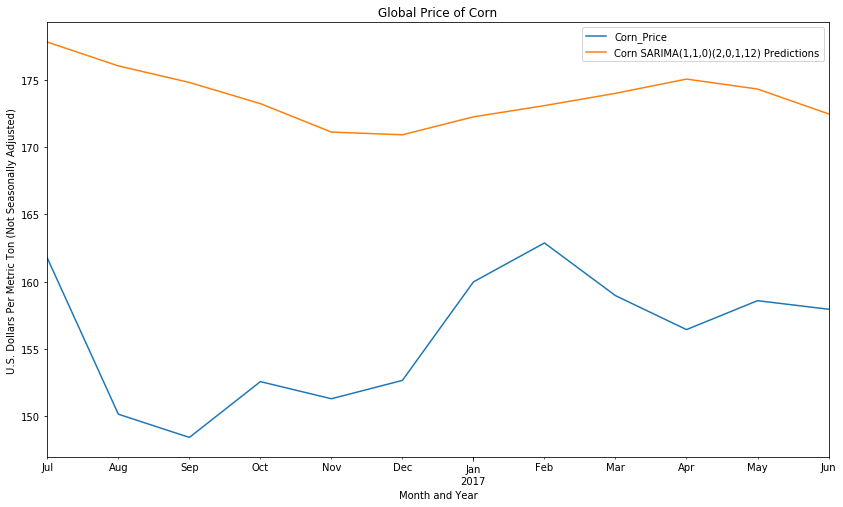

In [24]:
title7 = 'Global Price of Corn'
ylabel3 = 'U.S. Dollars Per Metric Ton (Not Seasonally Adjusted)'
xlabel3 = 'Month and Year'

ax3 = test['Corn_Price'].plot(legend=True, figsize=(14,8), title=title7)
corn_predictions.plot(legend=True)
ax3.autoscale(axis='x', tight=True)
ax3.set(xlabel=xlabel3, ylabel=ylabel3);

Evaluate global corn price training SARIMA(1,1,0)(2,0,1,12) model with mean squared error (MSE) and root mean squared error (RMSE).

In [25]:
corn_error1 = mean_squared_error(test['Corn_Price'], corn_predictions)
corn_error2 = rmse(test['Corn_Price'], corn_predictions)
print(f'SARIMA(1,1,0)(2,0,1,12) MSE Error: {corn_error1:11.10}')
print(f'SARIMA(1,1,0)(2,0,1,12) RMSE Error: {corn_error2:11.10}')

SARIMA(1,1,0)(2,0,1,12) MSE Error: 338.5260711
SARIMA(1,1,0)(2,0,1,12) RMSE Error:   18.399078


Retrain SARIMA(1,1,0)(2,0,1,12) model on entire global corn price data and forecast one year into the future.

In [26]:
corn_full_model = SARIMAX(corn_wheat2['Corn_Price'], order=(1,1,0), seasonal_order=(2,0,1,12))
corn_full_results = corn_full_model.fit()
corn_forecast = corn_full_results.predict(len(corn_wheat2), len(corn_wheat2) + 11, typ='levels').rename('Corn SARIMA(1,1,0)(2,0,1,12) Forecast')

Plot forecasted global corn prices alongside original corn price data.

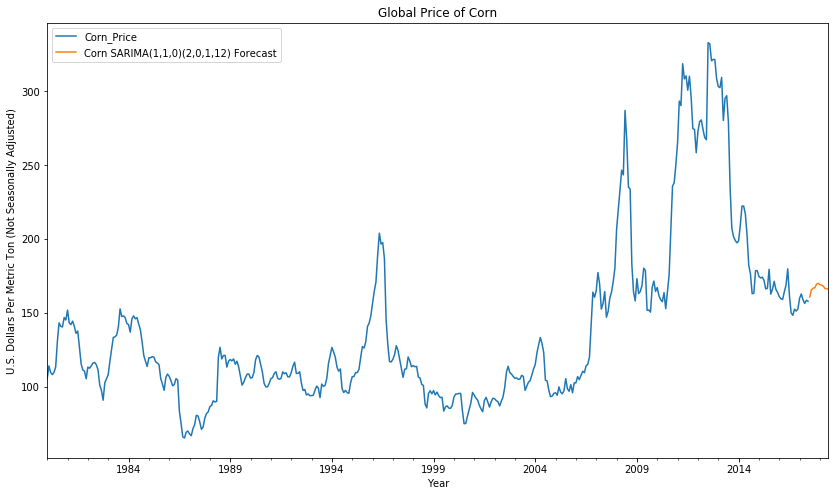

In [27]:
title8 = 'Global Price of Corn'
ylabel4 = 'U.S. Dollars Per Metric Ton (Not Seasonally Adjusted)'
xlabel4 = 'Year'

ax4 = corn_wheat2['Corn_Price'].plot(legend=True, figsize=(14,8), title=title8)
corn_forecast.plot(legend=True)
ax4.autoscale(axis='x', tight=True)
ax4.set(xlabel=xlabel4, ylabel=ylabel4);